In [839]:
from time import time
from datetime import date

from requests import get
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def plot_MOL_Bubi_dist():
    
    plt.figure()
    sns.displot(data = bikes_data, x = 'bikes', color = '#89bedc', height = 4, aspect = 2, bins = 15)

    plt.title('Elérhető MOL Bubi biciklik')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

def plot_MOL_bubi():
    
    bikes_data['size_for_plot'] = bikes_data['bikes'] + 1

    fig = px.scatter_mapbox(bikes_data, lat = 'lat', lon = 'lon', hover_name = 'name', 
                            #center = {"lat": 45.444617, "lon": 12.321308}, 
                            hover_data = ['name', 'bikes'],
                            title = 'MOL Bubi bicikli-állomások és szabad biciklik száma',
                            zoom = 10.9, size_max = 12, size = 'size_for_plot', 
                            mapbox_style = 'carto-positron', width = 750)
    fig.show()

    bikes_data.drop('size_for_plot', 1, inplace = True)
    
    
def plot_STOP_TYPES():
    
    order = megallok.groupby(['type'])['id'].count().sort_values(ascending  = False)
    
    plt.figure(figsize = (9, 4))
    ax = sns.countplot(y = 'type', data = megallok, color = '#89bedc', edgecolor = 'black', 
                       linewidth = 1/2, order = order.index)
    
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    plt.title('Megálló típusok száma')
    plt.xlabel(None)
    plt.xlim(0, 4900)
    plt.ylabel(None)
    plt.show()
    
def plot_gyujtok_map():

    fig = px.scatter_mapbox(gyujto_stop_count, lat = 'lat', lon = 'lon', hover_name = 'name', 
                            #center = {"lat": 45.444617, "lon": 12.321308}, 
                            hover_data = ['name', 'stop_count'],
                            title = 'BKK gyűjtőállomások elhelyezkedése',
                            labels = {'name' : 'Név', 'stop_count' : 'Megállók száma'},
                            zoom = 10, size_max = 15, size = 'stop_count', 
                            mapbox_style = 'carto-positron', height = 650, width = 950)
    fig.show()
    
    
def plot_stops_map():
    
    megallok['size'] = 1

    fig = px.scatter_mapbox(megallok, lat = 'lat', lon = 'lon', hover_name = 'name',
                            hover_data = ['name', 'routeIds', 'direction'],
                            title = 'BKK gyűjtőállomások elhelyezkedése', size = 'size', size_max = 4,
                            labels = {'name' : 'Név', 'routeIds' : 'Útvonalak', 'direction' : 'Irány'},
                            zoom = 10, mapbox_style = 'carto-positron', height = 650, width = 950)
    fig.show()
    
    megallok.drop('size', 1, inplace = True)
    
    
def plot_ROUTE_TYPES():
    
    order = routes.groupby(['type'])['id'].count().sort_values(ascending  = False)
    
    plt.figure(figsize = (9, 4))
    ax = sns.countplot(y = 'type', data = routes, color = '#89bedc', edgecolor = 'black', 
                       linewidth = 1/2, order = order.index)
    
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    plt.title('Útvonal típusok száma')
    plt.xlabel(None)
    plt.xlim(0, 350)
    plt.ylabel(None)
    plt.show()
    
    
def plot_CELALLOMAS():
    
    plt.figure(figsize = (9, 7))
    ax = sns.barplot(y = 'name', x = 'Útvonal végállomása', data = celallomasok, color = '#89bedc', edgecolor = 'black', 
                       linewidth = 1/2)
    
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    plt.title('Vég- és kiinduló-állomások')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()
    
def plot_vehicles_map():
    
    vehicles_df['size'] = 1

    fig = px.scatter_mapbox(vehicles_df, lat = 'lat', lon = 'lon', hover_name = 'shortName',
                            hover_data = ['shortName', 'licensePlate', 'model', 'vehicleRouteType', 'From', 'To', 'Megálló'],
                            title = 'Aktuális járművek', size = 'size', size_max = 4.5, 
                            labels = {'label' : 'Irány', 'licensePlate' : 'Rendszám', 'shortName' : 'Jármű száma',
                                      'model' : 'Típus', 'vehicleRouteType' : 'Járműtípus'},
                            color = 'vehicleRouteType', 
                            color_discrete_map = {'BUS' : 'blue', 'TRAM' : 'yellow', 'TROLLEYBUS' : 'red', 'SUBURBAN_RAILWAY' : 'green'},
                            zoom = 10, mapbox_style = 'carto-positron', height = 700, width = 1050)
    fig.show()
    
    vehicles_df.drop('size', 1, inplace = True)
    
    
def plot_VEHICLES_TYPES():
    
    order = vehicles_df['vehicleRouteType'].value_counts()
    
    plt.figure(figsize = (9, 4))
    ax = sns.countplot(y = 'vehicleRouteType', data = vehicles_df, color = '#89bedc', edgecolor = 'black', 
                       linewidth = 1/2, order = order.index)
    
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    plt.title('Aktív járművek típusai')
    plt.xlabel(None)
    plt.xlim(0, vehicles_df['vehicleRouteType'].value_counts().max() + 75)
    plt.ylabel(None)
    plt.show()
    
    
def plot_BUS_TYPE(filter_type = 'ikarus'):
    
    vehicles_df_buses = vehicles_df[vehicles_df['vehicleRouteType'] == 'BUS'].copy()
    
    vehicles_df_buses[filter_type] = 0
    vehicles_df_buses.loc[vehicles_df_buses['model'].str.lower().str.contains(filter_type), filter_type] = 1
    vehicles_df_buses[filter_type] = vehicles_df_buses[filter_type].astype(str)
    
    vehicles_df_buses['size'] = 1

    fig = px.scatter_mapbox(vehicles_df_buses, lat = 'lat', lon = 'lon', hover_name = 'shortName',
                            hover_data = ['shortName', 'licensePlate', 'model', 'vehicleRouteType', 'From', 'To', 'Megálló'],
                            title = 'Busztípusok elhelyezkedése - ' + filter_type, size = 'size', size_max = 5, 
                            labels = {'label' : 'Irány', 'licensePlate' : 'Rendszám', 'shortName' : 'Jármű száma',
                                      'model' : 'Típus', 'vehicleRouteType' : 'Járműtípus'},
                            color = filter_type, 
                            color_discrete_map = {'0': 'lightgreen', '1' : 'brown'},
                            zoom = 10, mapbox_style = 'carto-positron', height = 650, width = 950)
    fig.show()
    
    vehicles_df_buses.drop('size', 1, inplace = True)

In [618]:
headers = {'User-agent' : 'Mozilla/5.0 (Windows; U; Windows NT 5.1; de; rv:1.9.1.5) Gecko/20091102 Firefox/3.5.5'}

time_epoch = str(int(time()))
today = date.today().strftime("%Y%m%d")
lat = str(47.497913)
lon = str(19.040236)

In [619]:
vehicles_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/vehicles-for-location.json?ifModifiedSince=' + time_epoch + '&lat=' + lat + '&latSpan=1&lon=' + lon + '&lonSpan=1&key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b'
stops_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/stops-for-location.json?lat=' + lat + '&latSpan=1&lon=' + lon + '&lonSpan=1&key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b'
bikes_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/bicycle-rental.json?key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b'

In [537]:
stop_id = 'BKK_F03326' # 45, Anilin --> Ors

stop_schedule_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/schedule-for-stop.json?stopId=' + stop_id + '&key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b&_=' + time_epoch
stop_vehicle_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/vehicles-for-stop.json?stopId=' + stop_id + '&key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b'
stop_route_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/route-details-for-stop.json?stopId=' + stop_id + '&key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b'
stop_arrivals_departures_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/arrivals-and-departures-for-stop.json?includeReferences=agencies,routes,trips,stops&stopId=' + stop_id + '&minutesBefore=1&minutesAfter=30&key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b&_=' + time_epoch

In [192]:
trip_id = 'BKK_C377521' # random trip

trip_link = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/trip-details.json?tripId=' + trip_id + '&date=' + today + '&key=bkk-web&version=4&appVersion=3.13.1-59506-4e2e9a7b&_=' + time_epoch

In [620]:
%%time

vehicles = get(vehicles_link, headers = headers).json()['data']
stops = get(stops_link, headers = headers).json()['data']
bikes = get(bikes_link, headers = headers).json()['data']

Wall time: 1.13 s


### Bikes

In [166]:
bikes_data = pd.DataFrame(bikes['list'])
bikes_data.drop(['type', 'spaces'], 1, inplace = True)

<Figure size 432x288 with 0 Axes>

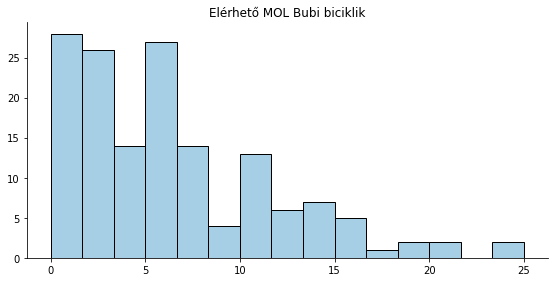

In [167]:
plot_MOL_Bubi_dist()

In [384]:
plot_MOL_bubi()

### Stops

In [464]:
stops_df = pd.DataFrame.from_dict(stops['references']['stops'], orient = 'index').reset_index(drop = True)
stops_df.drop(['description', 'style', 'wheelchairBoarding'], 1, inplace = True)
stops_df.head(3)

id        lat        lon          name      code direction  \
0  BKK_CSF00232  47.513817  19.033945  Margit körút  CSF00232             
1  BKK_CSF00233  47.514609  19.033215  Apostol utca  CSF00233             
2  BKK_CSF01563  47.483975  19.117162   Egészségház  CSF01563             

   locationType locationSubType routeIds stopColorType parentStationId type  
0             1       stop-area       []         OTHER             NaN  NaN  
1             1       stop-area       []         OTHER             NaN  NaN  
2             1       stop-area       []         OTHER             NaN  NaN

In [465]:
gyujtok = stops_df[(stops_df['type'].isnull()) & 
                   (stops_df['stopColorType'] == 'OTHER') & 
                   (stops_df['locationSubType'].isin(['station', 'stop-area']))].copy()

In [466]:
megallok = stops_df[(stops_df['type'].notnull())].copy()
megallok.drop(['locationType', 'locationSubType'], 1, inplace = True)

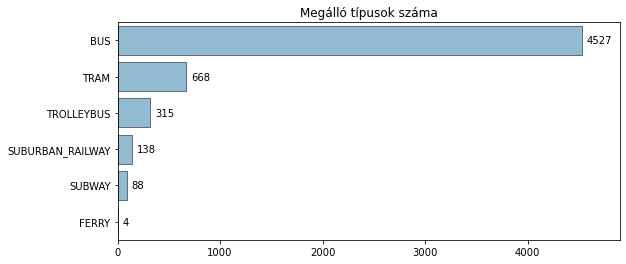

In [467]:
plot_STOP_TYPES()

In [468]:
gyujto_stop_count = megallok.groupby('parentStationId')['id'].count().reset_index().rename(columns = {'id' : 'stop_count'})
gyujto_stop_count = gyujtok[['id', 'lat', 'lon', 'name']].merge(gyujto_stop_count, left_on = 'id', right_on = 'parentStationId').drop('parentStationId', 1)

In [469]:
plot_gyujtok_map()

In [470]:
plot_stops_map()

### Routes

In [817]:
routes = pd.DataFrame.from_dict(stops['references']['routes'], orient = 'index')\
                     .reset_index(drop = True)\
                     .drop(['color', 'textColor', 'agencyId', 'innerInternal', 'longName', 'iconDisplayType', 'iconDisplayText', 'style', 'sortOrder', 'bikesAllowed'], 1)

# potlok = routes[routes['id'].str.contains('VP|HP|MP')]
# potlok kiszurese
# routes = routes[~routes['id'].str.contains('VP|HP|MP')]

routes[['From', 'To']] = routes['description'].str.split('|', expand = True)

routes['To'] = routes['To'].str.strip()
routes['From'] = routes['From'].str.strip()

routes.drop(['description'], 1, inplace = True)

routes.head(3)

id shortName type                     From                   To
0  BKK_9960       996  BUS  Cinkotai autóbuszgarázs     Újpest-központ M
1  BKK_9720       972  BUS   Törökbálint, Nyár utca  Móricz Zs. körtér M
2  BKK_9961      996A  BUS  Cinkotai autóbuszgarázs     Újpest-központ M

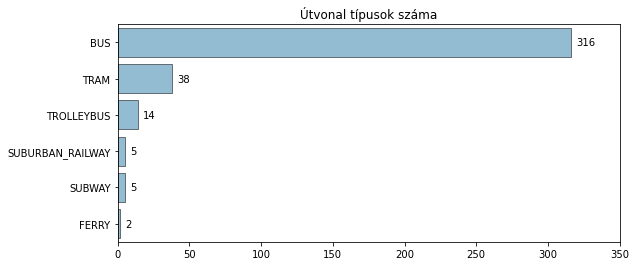

In [818]:
plot_ROUTE_TYPES()

In [819]:
celallomasok = pd.concat([routes['From'], routes['To']]).value_counts().reset_index().rename(columns = {'index' : 'name', 0 : 'Útvonal végállomása'}).head(25)
#celallomasok = stops_df[['name', 'lat', 'lon']].copy().drop_duplicates('name').merge(celallomasok, how = 'right')

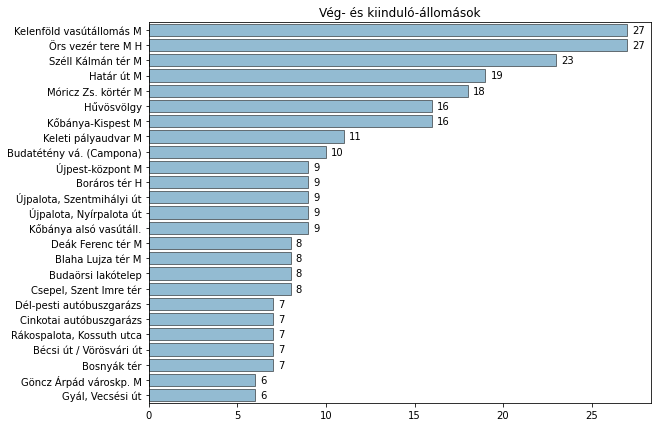

In [820]:
plot_CELALLOMAS()

### Vehicles - currently active on Map

In [847]:
# vehicles['references']['trips']

In [849]:
vehicles_df = pd.DataFrame(vehicles['list']).drop(['stale', 'serviceDate', 'stopSequence', 'lastUpdateTime', 'status', 'congestionLevel', 'bearing', 'capacity', 'stopDistancePercent', 'wheelchairAccessible', 'style', 'deviated'], 1)
vehicles_df = pd.concat([vehicles_df, pd.json_normalize(vehicles_df['location'])], 1)

vehicles_df = vehicles_df.merge(routes, left_on = 'routeId', right_on = 'id', how = 'left')
vehicles_df = vehicles_df.merge(stops_df[['id', 'name']], left_on = 'stopId', right_on = 'id', how = 'left')

vehicles_df.drop(['location', 'type', 'routeId', 'stopId', 'id_x', 'id_y'], 1, inplace = True)
vehicles_df.rename(columns = {'name' : 'Megálló'}, inplace = True)

vehicles_df.head(3)

vehicleId licensePlate                  label  \
0  BKK_3663       LOV871  Soroksár, IKEA áruház   
1  BKK_4751        V4062        Márton Áron tér   
2  BKK_4993        V4334                    NaN   

                            model vehicleRouteType          tripId       lat  \
0  VanHool AG318 csuklós autóbusz              BUS   BKK_C36950309  47.41292   
1                     Tátra T5C5K             TRAM  BKK_C348093066  47.50776   
2                     Tátra T5C5K             TRAM             NaN  47.43984   

         lon shortName                   From                  To  \
0  19.161177       123  Soroksár, IKEA áruház          Határ út M   
1  19.021832        59        Márton Áron tér  Szent János Kórház   
2  19.035786       NaN                    NaN                 NaN   

              Megálló  
0                 NaN  
1  Széll Kálmán tér M  
2                 NaN

In [842]:
for i in vehicles_df['vehicleRouteType'].unique():
    print(i, '- Modellek\n')
    print(vehicles_df[vehicles_df['vehicleRouteType'] == i]['model'].value_counts())
    print('\n')

BUS - Modellek

MERCEDES Conecto csuklós                    133
MAN Lions City A21 (ArrivaBus)               99
Volvo 7700A típusú csuklós autóbusz          86
MB Citaro C2-S1-G csuklós autóbusz           68
MB Citaro C2-S1 szóló autóbusz               56
MAN A21 szóló (Volán, helyi, 3 ajtós)        56
MERCEDES Conecto szóló (BKV)                 54
MERCEDES Conecto 2 szóló autóbusz            43
MERCEDES Citaro O 530 (BKV spec.)            42
Volvo szóló autóbusz                         31
VanHool A330 CNG típusú szóló autóbusz       30
MERCEDES Conecto G 2 csuklós autóbusz        25
VanHool  NewAG300 csuklós autóbusz           21
Modulo M108d szóló autóbusz                  19
MERCEDES Conecto G 3 csuklós busz(Volán)     18
MAN A21 szóló (Volán, helyközi, 2 ajtós)     17
Mercedes-Benz eCitaro                        16
Volvo hibrid szóló (BKV, 3 ajt) autóbusz     15
Ikarus 127V típusú szóló autóbusz            15
Ikarus 280-as típusú autóbusz                15
VOLVO-ALFABUSZ Civis 12 

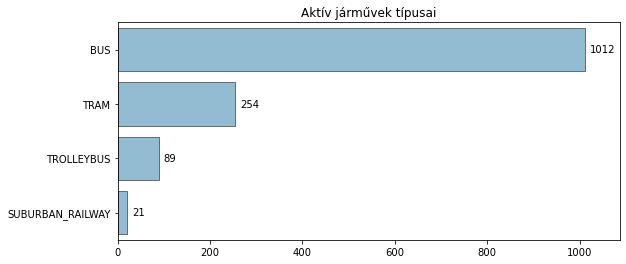

In [843]:
plot_VEHICLES_TYPES()

In [844]:
plot_vehicles_map()

In [845]:
plot_BUS_TYPE('ikarus')

### Stop-related information

In [580]:
# stop_schedule = get(stop_schedule_link, headers = headers).json()['data']
# [{i['routeId'] : i['directions'][0]['stopTimes']} for i in stop_schedule['entry']['schedules']]

In [588]:
# pd.DataFrame(get(stop_vehicle_link, headers = headers).json()['data']['list'])

In [595]:
# pd.DataFrame(get(stop_route_link, headers = headers).json()['data']['list']) # NOT NEEDED

In [607]:
# get(stop_arrivals_departures_link, headers = headers).json()['data']['references']['trips']